## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

  import numpy.matlib as npm

  autumn = cm.get_cmap('autumn', 256)

  winter = cm.get_cmap('winter_r', 256)



In [3]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run) 

<module 'sim.sim_run' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim_run.py'>

#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 2.8%
RAM Usage: 2.8%
Available RAM: 1.4T
Total RAM: 1.5T
52.4G


In [5]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.00 GB


In [6]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [7]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

### Model Parameter Counts

#### **Linear Models**
- **PCA Bilinear:** 730  _(27 PCs)_
- **PLS Bilinear:** 101  _(10 PLS components)_
- **Bilinear Low-rank:** 73,800  _(rank 10)_
- **PLS MLP:** 158,993  _(10 PLS components, including PLS projection matrices)_
- **PCA MLP:** 47,873  _(27 PCs, 2-layer)_

---

#### **MLP and SMT Models**

#### 2-Layer Models
- **MLP:** 3,812,609
- **SMT:** 1,399,947
- **MLP w/ CLS:** 3,814,145
- **SMT w/ CLS:** 1,405,579

#### 3-Layer Models
- **MLP:** 7,723,777
- **SMT:** 2,162,315
- **MLP w/ CLS:** 7,726,849
- **SMT w/ CLS:** 2,173,067

---

### Coord MLP Parameter Counts
- **[32]:** 321
- **[64, 32]:** 2,753
- **[128, 64]:** 9,601
- **[256, 128]:** 35,685
- **[512, 256, 128]:** 169,729

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


  return LooseVersion(v) >= LooseVersion(check)

ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: asratzan (alexander-ratzan-new-york-university). Use `wandb login --relogin` to force relogin
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: hpp4nt4e
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/hpp4nt4e
Initialized sweep with ID: hpp4nt4e
2
3
4
BEST CONFIG {'input_dim': 14760, 'binarize': False, 'token_encoder_dim': 20, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'transformer_dropout': 0.4, 'dropout_rate': 0.4, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'batch_size': 1024, 'aug_prob': 0.0, 'epochs': 50, 'num_workers': 2, 'prefetch_factor': 4}


  warnings.warn(



Number of learnable parameters in SMT model: 4676235
Using 2 workers and 4 prefetch factor
Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.02 GB


  warnings.warn(



Best val loss so far at epoch 1: 0.0404
Best val loss so far at epoch 2: 0.0383
Epoch 5/50, Train Loss: 0.0968, Val Loss: 0.0440, Time: 6.91s
Best val loss so far at epoch 7: 0.0375
Best val loss so far at epoch 8: 0.0350
Best val loss so far at epoch 9: 0.0338
Best val loss so far at epoch 10: 0.0333
Epoch 10/50, Train Loss: 0.0430, Val Loss: 0.0333, Time: 6.97s
Best val loss so far at epoch 11: 0.0328
Best val loss so far at epoch 12: 0.0324
Best val loss so far at epoch 13: 0.0321
Best val loss so far at epoch 14: 0.0320
Best val loss so far at epoch 15: 0.0320
Epoch 15/50, Train Loss: 0.0330, Val Loss: 0.0320, Time: 6.94s
Best val loss so far at epoch 16: 0.0319
Best val loss so far at epoch 19: 0.0316
Best val loss so far at epoch 20: 0.0305
Epoch 20/50, Train Loss: 0.0298, Val Loss: 0.0305, Time: 6.94s
Best val loss so far at epoch 21: 0.0292
Best val loss so far at epoch 22: 0.0265
Best val loss so far at epoch 23: 0.0243
Best val loss so far at epoch 24: 0.0221
Best val loss so

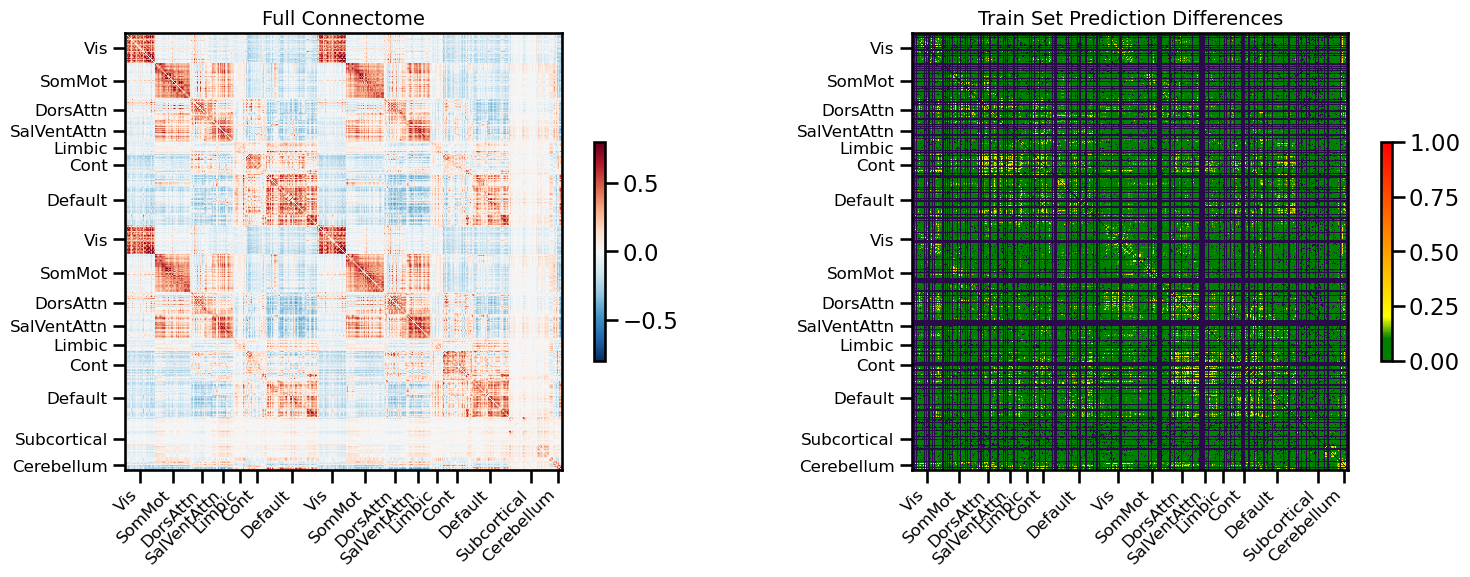

<Figure size 640x480 with 0 Axes>

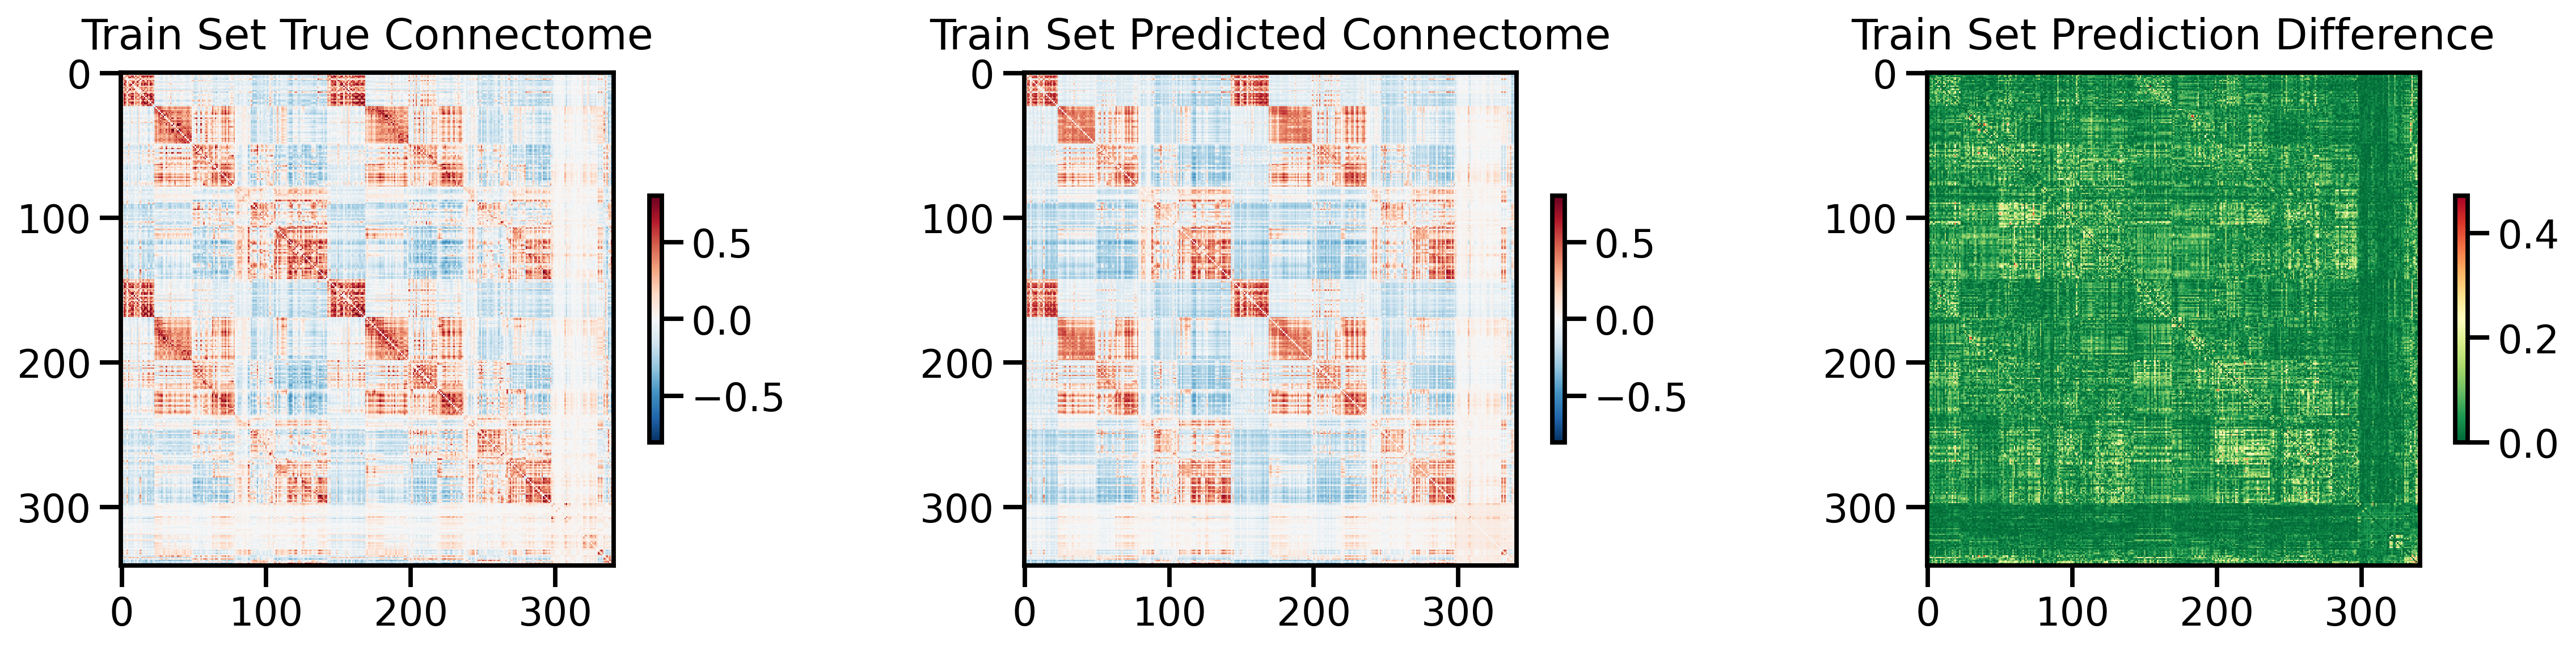

<Figure size 640x480 with 0 Axes>

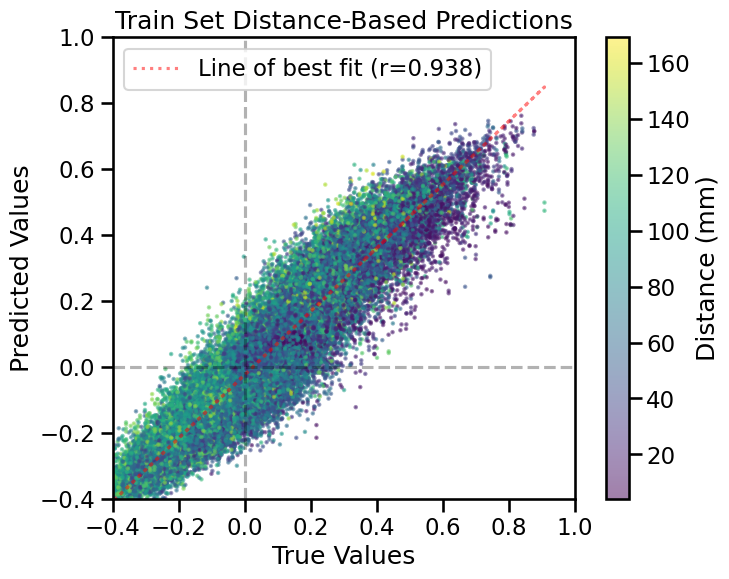

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 114 regions, 12882 connections


<Figure size 640x480 with 0 Axes>

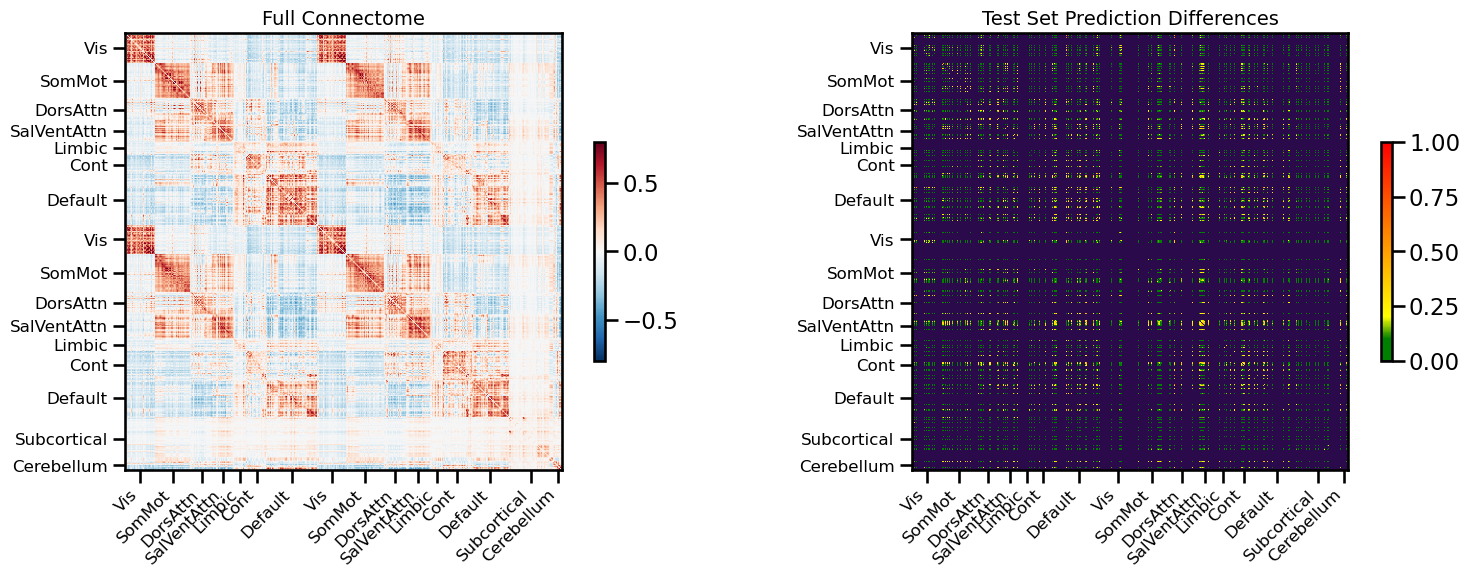

<Figure size 640x480 with 0 Axes>

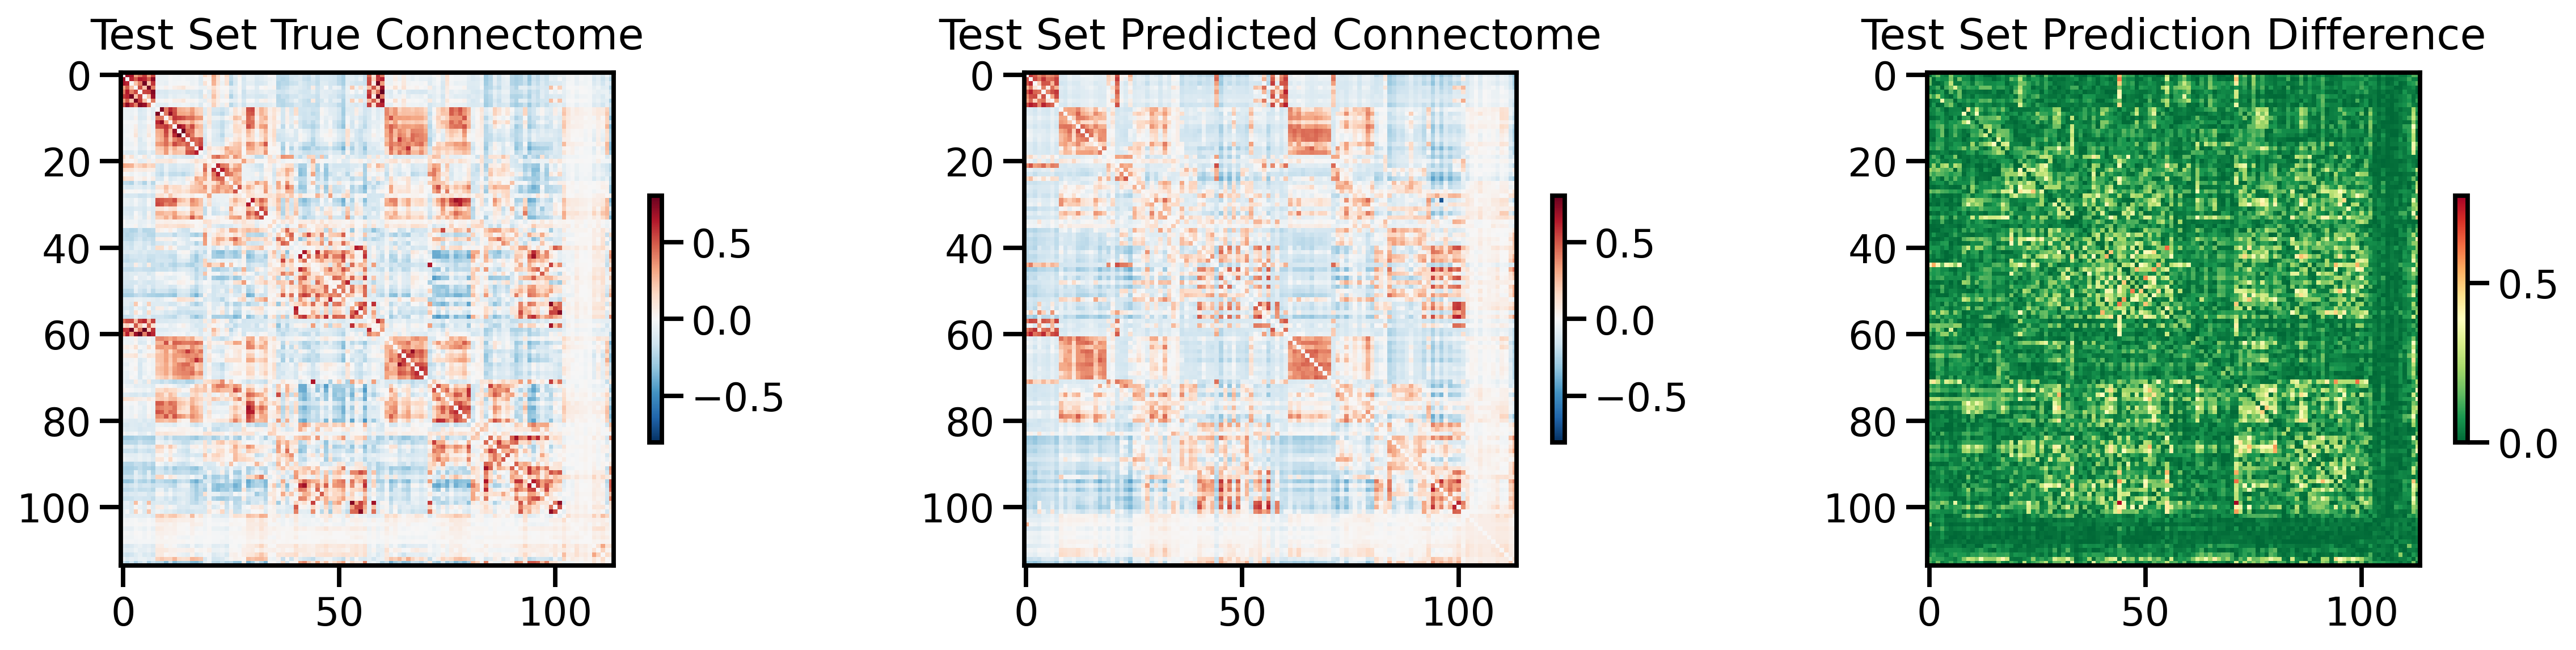

<Figure size 640x480 with 0 Axes>

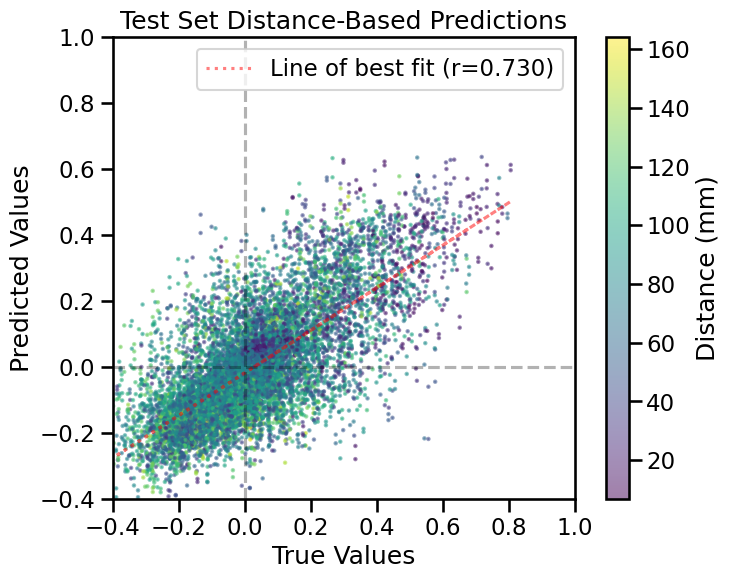

TRAIN METRICS
GLOBAL: mse=0.004742, mae=0.051318, r2=0.8566, pearson_r=0.9384, spearman_r=0.9174, geodesic_distance=18.9966
DISTANCE-BASED: short=0.9437, mid=0.9313, long=0.9291
HEMISPHERIC: left=0.9425, right=0.9490, inter=0.9398
CONNECTION STRENGTH: neg=0.4086, weak=0.8941, pos=0.6692
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.7690    0.8865
  Default       0.8978    0.9223
  SalVentAttn    0.9087    0.9448
  Limbic        0.7971    0.9002
  DorsAttn      0.8692    0.9295
  SomMot        0.7904    0.9449
  Vis           0.9071    0.9002
  Subcortical    0.7678    0.8581
  Cerebellum    0.8199    0.8819

TEST METRICS
GLOBAL: mse=0.017338, mae=0.093488, r2=0.4954, pearson_r=0.7304, spearman_r=0.6980, geodesic_distance=12.9749
DISTANCE-BASED: short=0.7582, mid=0.6960, long=0.6847
HEMISPHERIC: left=0.7183, right=0.7669, inter=0.7239
CONNECTION STRENGTH: neg=0.0509, weak=0.6176, pos=0.3811
NETWORK CORRELATIONS:
  NETWORK      I

45182

<Figure size 640x480 with 0 Axes>

In [8]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=9,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='shared_transformer',
              use_gpu=True, 
              null_model='none',
              use_folds=[0]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()

In [29]:
# takes 38 minutes for 4 folds in parallel on h100
# 13 mins single fold a100